In [66]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2
import pandas as pd
#In Python: Define a database name (we're using a dataset on births, so I call it 
# birth_db), and your username for your computer (CHANGE IT BELOW). 
dbname = 'bills_db'
username = 'joeljoel'
## 'engine' is a connection to a database
## Here, we're using postgres, but sqlalchemy can connect to other things too.
engine = create_engine('postgresql://%s@localhost/%s'%(username,dbname))
print(engine.url)

postgresql://joeljoel@localhost/bills_db


In [67]:
## Now try the same queries, but in python!

# connect:
con = None
con = psycopg2.connect(database = dbname, user = username)

# query:
sql_query = """
SELECT * FROM us_bills;
"""
us_bills = pd.read_sql_query(sql_query,con)

us_bills.head()

/var/folders/qb/nxfghts14xv2gh9svxdkp3d40000gn/T/ipykernel_1675/3938873270.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  us_bills = pd.read_sql_query(sql_query,con)


,bill_num,bill_name,bill_text,top_subject
0,hjres93-114,Proposing a balanced budget amendment to the C...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Economics and public finance
1,hjres67-114,Disapproving a rule submitted by the Environme...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Environmental protection
2,hjres60-114,"Expressing support for designation of a ""Natio...","{""\n"",""[Congressional Bills 114th Congress]\n""...",International affairs
3,hjres94-114,Conferring honorary citizenship of the United ...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Immigration
4,hjres69-114,Proposing a balanced budget amendment to the C...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Economics and public finance


In [68]:
us_bills.iloc[0]['bill_text']

'{"\n","[Congressional Bills 114th Congress]\n","[From the U.S. Government Publishing Office]\n","[H.J. Res. 93 Introduced in House (IH)]\n","\n","<DOC>\n","\n","\n","\n","\n","\n","\n","114th CONGRESS\n","  2d Session\n","H. J. RES. 93\n","\n","Proposing a balanced budget amendment to the Constitution of the United \n","                                States.\n","\n","\n","_______________________________________________________________________\n","\n","\n","                    IN THE HOUSE OF REPRESENTATIVES\n","\n","                              May 10, 2016\n","\n","   Mr. Gohmert introduced the following joint resolution; which was \n","               referred to the Committee on the Judiciary\n","\n","_______________________________________________________________________\n","\n","                            JOINT RESOLUTION\n","\n","\n"," \n","Proposing a balanced budget amendment to the Constitution of the United \n","                                States.\n","\n","    Resolved

In [69]:
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
bill_text = us_bills['bill_text']
bill_text.shape

(10933,)

In [71]:
words = [bill.split() for bill in bill_text]

In [72]:
import re
refined_words = [re.sub(r'[\W_]+','',s).lower() for word in words for s in word]

In [73]:
no_empties = [x for x in refined_words if len(x) > 3]

In [74]:
len(no_empties)

13011235

In [75]:
from functools import reduce

In [76]:
wordcloud = WordCloud().generate(reduce(lambda a, b: a + " " + b, no_empties[0:100000]))

(-0.5, 399.5, 199.5, -0.5)

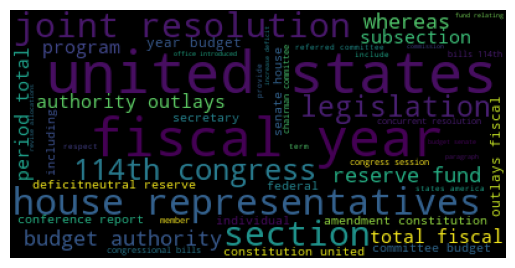

In [77]:
plt.imshow(wordcloud)
plt.axis("off")

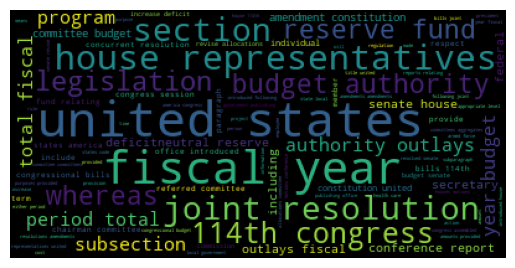

In [78]:
wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(reduce(lambda a,b: a+" "+b,no_empties[0:100000]))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

In [80]:
vect = CountVectorizer()
vect.fit(bill_text)
vect.get_feature_names_out()

array(['00', '000', '0000', ..., 'zz', 'zzz', 'zzzz'], dtype=object)

In [81]:
simple_train_dtm = vect.transform(bill_text)
simple_train_dtm

<10933x55476 sparse matrix of type '<class 'numpy.int64'>'
	with 3754903 stored elements in Compressed Sparse Row format>

In [82]:
us_bills['international_affairs']=0

In [83]:
us_bills['marine_and_inland_water_transportation'] = 0

In [84]:
us_bills.head()

,bill_num,bill_name,bill_text,top_subject,international_affairs,marine_and_inland_water_transportation
0,hjres93-114,Proposing a balanced budget amendment to the C...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Economics and public finance,0,0
1,hjres67-114,Disapproving a rule submitted by the Environme...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Environmental protection,0,0
2,hjres60-114,"Expressing support for designation of a ""Natio...","{""\n"",""[Congressional Bills 114th Congress]\n""...",International affairs,0,0
3,hjres94-114,Conferring honorary citizenship of the United ...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Immigration,0,0
4,hjres69-114,Proposing a balanced budget amendment to the C...,"{""\n"",""[Congressional Bills 114th Congress]\n""...",Economics and public finance,0,0


In [85]:
# query:
sql_query = """
SELECT bill_num, subject FROM bill_subject WHERE subject='International affairs' OR subject='International Affairs';
"""
international_terms = pd.read_sql_query(sql_query,con)

/var/folders/qb/nxfghts14xv2gh9svxdkp3d40000gn/T/ipykernel_1675/1754938046.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  international_terms = pd.read_sql_query(sql_query,con)


In [86]:
# query:
sql_query = """
SELECT bill_num, subject FROM bill_subject WHERE subject='Marine and inland water transportation';
"""
marine_terms = pd.read_sql_query(sql_query,con)

/var/folders/qb/nxfghts14xv2gh9svxdkp3d40000gn/T/ipykernel_1675/460232925.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  marine_terms = pd.read_sql_query(sql_query,con)


In [87]:
marine_terms

,bill_num,subject
0,sconres11-114,Marine and inland water transportation
1,s1519-114,Marine and inland water transportation
2,s33-114,Marine and inland water transportation
3,s589-114,Marine and inland water transportation
4,s1376-114,Marine and inland water transportation
...,...,...
132,hr980-114,Marine and inland water transportation
133,hr974-114,Marine and inland water transportation
134,hr710-114,Marine and inland water transportation
135,hr3996-114,Marine and inland water transportation


In [88]:
us_bills.loc[us_bills['bill_num'].isin(marine_terms['bill_num']), 'marine_and_inland_water_transportation'] = 1

In [89]:
X = us_bills['bill_text']
y = us_bills['marine_and_inland_water_transportation']

In [90]:
# split into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [91]:
# import and instantiate the vectorizer
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [92]:
# fit and transform X_train, but only transform X_test
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [93]:
# import/instantiate/fit
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)

MultinomialNB()

In [94]:
# make class predictions
y_pred_class = nb.predict(X_test_dtm)

In [95]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.9678127286027798


In [96]:
# predict class probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [97]:
y_test[y_test == 1]

897     1
2298    1
1915    1
714     1
1300    1
9636    1
689     1
619     1
7587    1
8741    1
4331    1
8712    1
6332    1
1356    1
9677    1
7673    1
939     1
5822    1
1723    1
9679    1
8784    1
6304    1
2671    1
7421    1
617     1
9868    1
2157    1
150     1
1437    1
5090    1
6276    1
Name: marine_and_inland_water_transportation, dtype: int64

In [98]:
# calculate the AUC using y_test_binary and y_pred_prob
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.8837611733677038


In [99]:
%matplotlib inline
import matplotlib.pyplot as plt

Text(0, 0.5, 'True Positive Rate (Sensitivity)')

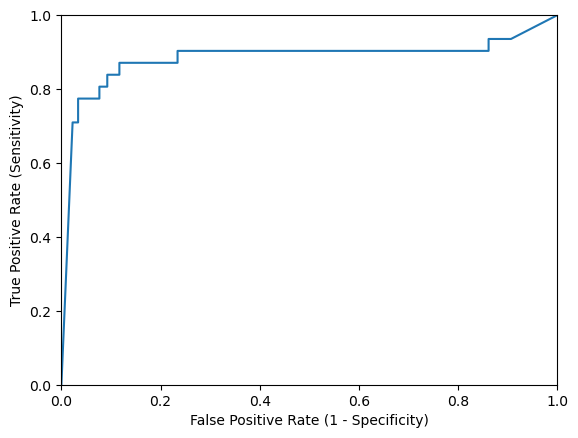

In [100]:
# plot ROC curve using y_test_binary and y_pred_prob
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [101]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[2624   79]
 [   9   22]]


In [102]:
# first 10 false positives (meaning they were incorrectly classified as 5-star reviews)
X_test[y_test < y_pred_class][:10]

10790    {"\n","[Congressional Bills 114th Congress]\n"...
8149     {"\n","[Congressional Bills 114th Congress]\n"...
5500     {"\n","[Congressional Bills 114th Congress]\n"...
2987     {"\n","[Congressional Bills 114th Congress]\n"...
6273     {"\n","[Congressional Bills 114th Congress]\n"...
1154     {"\n","[Congressional Bills 114th Congress]\n"...
8460     {"\n","[Congressional Bills 114th Congress]\n"...
8315     {"\n","[Congressional Bills 114th Congress]\n"...
8211     {"\n","[Congressional Bills 114th Congress]\n"...
8713     {"\n","[Congressional Bills 114th Congress]\n"...
Name: bill_text, dtype: object

In [103]:
len(X_test[y_test < y_pred_class])

79

In [104]:
X_test.iloc[10]

'{"\n","[Congressional Bills 114th Congress]\n","[From the U.S. Government Publishing Office]\n","[S. Res. 252 Placed on Calendar Senate (PCS)]\n","\n","                                                       Calendar No. 226\n","114th CONGRESS\n","  1st Session\n","S. RES. 252\n","\n","      Expressing the sense of the Committee on Small Business and \n","Entrepreneurship of the Senate relating to easing the burden of Federal \n","                  tax compliance on small businesses.\n","\n","\n","_______________________________________________________________________\n","\n","\n","                   IN THE SENATE OF THE UNITED STATES\n","\n","                           September 15, 2015\n","\n"," Mr. Vitter, from the Committee on Small Business and Entrepreneurship \n"," of the Senate, reported the following original resolution; which was \n","                         placed on the calendar\n","\n","_______________________________________________________________________\n","\n","    

In [105]:
us_bills.iloc[74]

bill_num                                                                        hjres64-114
bill_name                                 Disapproving of the agreement transmitted to C...
bill_text                                 {"\n","[Congressional Bills 114th Congress]\n"...
top_subject                                                           International affairs
international_affairs                                                                     0
marine_and_inland_water_transportation                                                    0
Name: 74, dtype: object

In [106]:
# first 10 false negatives (meaning they were incorrectly classified as 1-star reviews)
X_test[y_test > y_pred_class][:10]

897     {"\n","[Congressional Bills 114th Congress]\n"...
2298    {"\n","[Congressional Bills 114th Congress]\n"...
1915    {"\n","[Congressional Bills 114th Congress]\n"...
4331    {"\n","[Congressional Bills 114th Congress]\n"...
6332    {"\n","[Congressional Bills 114th Congress]\n"...
1723    {"\n","[Congressional Bills 114th Congress]\n"...
8784    {"\n","[Congressional Bills 114th Congress]\n"...
150     {"\n","[Congressional Bills 114th Congress]\n"...
5090    {"\n","[Congressional Bills 114th Congress]\n"...
Name: bill_text, dtype: object

In [114]:
X_test.iloc[399]

'{"\n","[Congressional Bills 114th Congress]\n","[From the U.S. Government Publishing Office]\n","[H.R. 4974 Placed on Calendar Senate (PCS)]\n","\n","<DOC>\n","\n","\n","\n","\n","\n","                                                       Calendar No. 503\n","114th CONGRESS\n","  2d Session\n","                                H. R. 4974\n","\n","\n","_______________________________________________________________________\n","\n","\n","                   IN THE SENATE OF THE UNITED STATES\n","\n","                              May 26, 2016\n","\n","            Received; read twice and placed on the calendar\n","\n","_______________________________________________________________________\n","\n","                                 AN ACT\n","\n","\n"," \n","  Making appropriations for military construction, the Department of \n","   Veterans Affairs, and related agencies for the fiscal year ending \n","              September 30, 2017, and for other purposes.\n","\n","    Be it enacted b

In [108]:
us_bills.iloc[399]

bill_num                                                                           s324-114
bill_name                                 A bill to amend the Internal Revenue Code of 1...
bill_text                                 {"\n","[Congressional Bills 114th Congress]\n"...
top_subject                                                                        Taxation
international_affairs                                                                     0
marine_and_inland_water_transportation                                                    0
Name: 399, dtype: object

In [109]:
# don't convert to lowercase, we end up with more features
vect = CountVectorizer(lowercase=False)
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(8199, 72937)

In [110]:
# include 1-grams and 2-grams, we end up with many features
vect = CountVectorizer(lowercase=False, ngram_range=(1, 2),stop_words='english')
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm.shape

(8199, 1829035)

In [111]:
# create document-term matrices
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

# use Naive Bayes to predict the star rating
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

# calculate accuracy
print(metrics.accuracy_score(y_test, y_pred_class))

0.9886613021214338


In [112]:
# predict class probabilities
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]

In [113]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[2689   14]
 [  17   14]]
